Epoch 1/50
4/4 - 3s - loss: 2.0041 - accuracy: 0.1875 - val_loss: 1.9238 - val_accuracy: 0.2125
Epoch 2/50
4/4 - 0s - loss: 1.9521 - accuracy: 0.2000 - val_loss: 1.8799 - val_accuracy: 0.2250
Epoch 3/50
4/4 - 0s - loss: 1.9024 - accuracy: 0.2125 - val_loss: 1.8375 - val_accuracy: 0.2250
Epoch 4/50
4/4 - 0s - loss: 1.8525 - accuracy: 0.2281 - val_loss: 1.7959 - val_accuracy: 0.2500
Epoch 5/50
4/4 - 0s - loss: 1.8038 - accuracy: 0.2281 - val_loss: 1.7550 - val_accuracy: 0.2625
Epoch 6/50
4/4 - 0s - loss: 1.7569 - accuracy: 0.2438 - val_loss: 1.7143 - val_accuracy: 0.3000
Epoch 7/50
4/4 - 0s - loss: 1.7110 - accuracy: 0.2500 - val_loss: 1.6746 - val_accuracy: 0.3125
Epoch 8/50
4/4 - 0s - loss: 1.6645 - accuracy: 0.2750 - val_loss: 1.6357 - val_accuracy: 0.3500
Epoch 9/50
4/4 - 0s - loss: 1.6199 - accuracy: 0.3125 - val_loss: 1.5971 - val_accuracy: 0.3750
Epoch 10/50
4/4 - 0s - loss: 1.5763 - accuracy: 0.3375 - val_loss: 1.5589 - val_accuracy: 0.4000
Epoch 11/50
4/4 - 0s - loss: 1.5323 - a

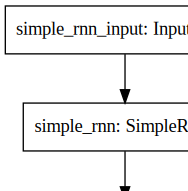

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import arff
import numpy as np

dataset, meta = arff.loadarff('data/ECG5000_TRAIN.arff')
test, t_mata = arff.loadarff('data/ECG5000_TEST.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset = ds[:, :140]
y_dataset = np.asarray(ds[:, -1].tolist(), dtype=np.int8)-1

x_train, x_test, y_train, y_test = train_test_split(
    x_dataset[:, :, np.newaxis], to_categorical(y_dataset), test_size=0.2, random_state=42)


#モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

#SimpleRNNにDenseを接続して，分類
model = Sequential()

model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:]))
#input_shape=(系列長T, x_tの次元), output_shape=(units(=hid_dim),)
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#モデルの学習
model.fit(x_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

#モデルによる分類制度の評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

#モデルの可視化
from IPython.display import SVG 
from tensorflow.python.keras.utils.vis_utils import model_to_dot 

SVG(model_to_dot(model).create(prog='dot', format='svg'))

